# Exploratory Data Analysis for N-BEATS Time Series Project

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use("seaborn-v0_8")


In [3]:
import numpy as np

# Placeholder for generate_time_series
def generate_time_series(n_steps=5000):
    # Example: a simple sinusoidal series with some noise and trend
    t = np.arange(n_steps)
    series = 50 + 5 * np.sin(t / 10) + 2 * np.cos(t / 50) + 0.1 * t + np.random.randn(n_steps)
    return series

series = generate_time_series(n_steps=5000)
time = np.arange(len(series))

print("Series length:", len(series))


Series length: 5000


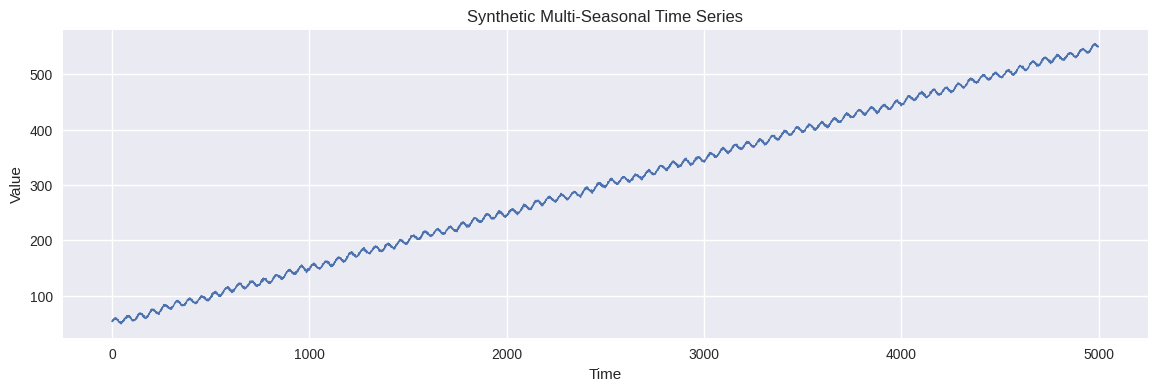

In [4]:

plt.figure(figsize=(14,4))
plt.plot(time, series, linewidth=1)
plt.title("Synthetic Multi-Seasonal Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


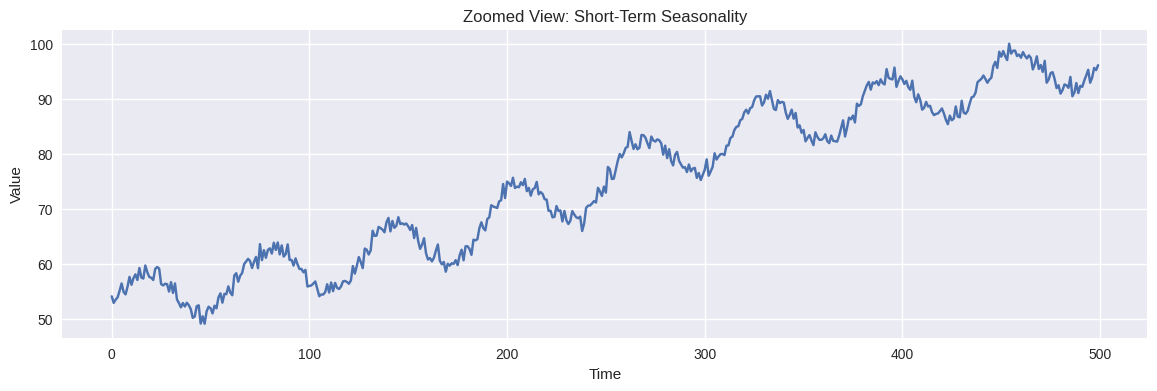

In [5]:

plt.figure(figsize=(14,4))
plt.plot(series[:500])
plt.title("Zoomed View: Short-Term Seasonality")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


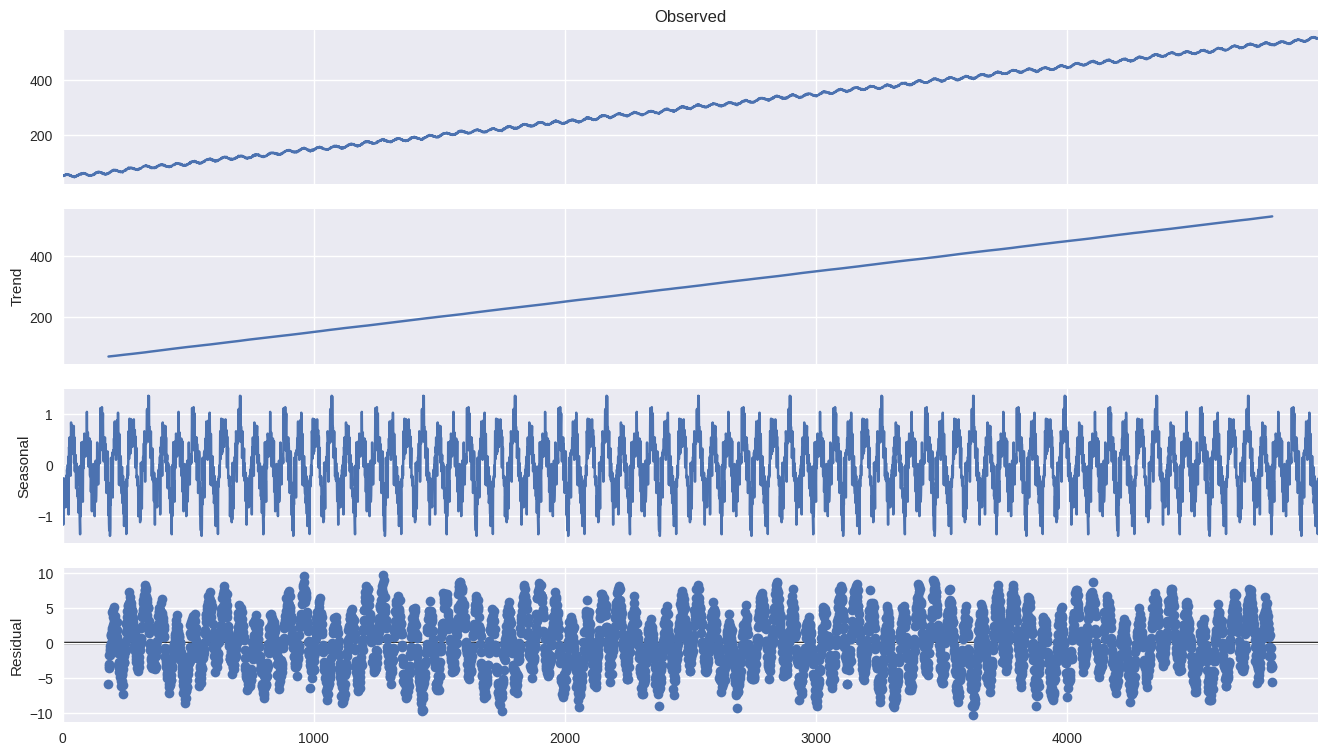

In [6]:

decomposition = seasonal_decompose(series, model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14,8)
plt.show()


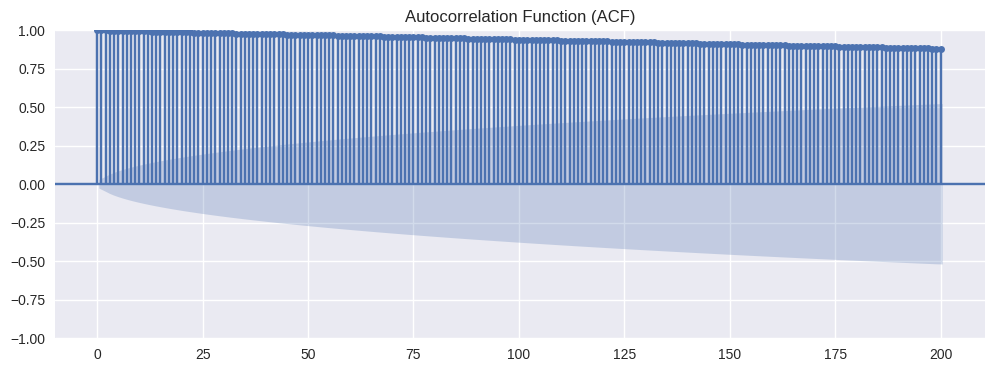

In [7]:

plt.figure(figsize=(12,4))
plot_acf(series, lags=200, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")
plt.show()


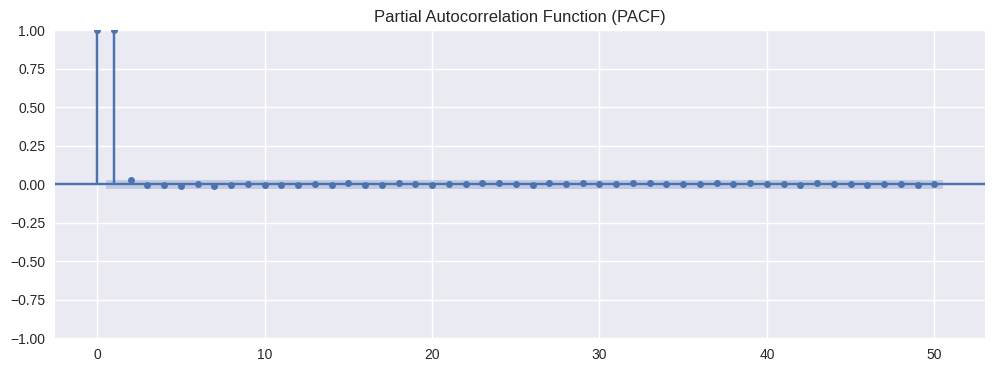

In [8]:

plt.figure(figsize=(12,4))
plot_pacf(series, lags=50, ax=plt.gca(), method="ywm")
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


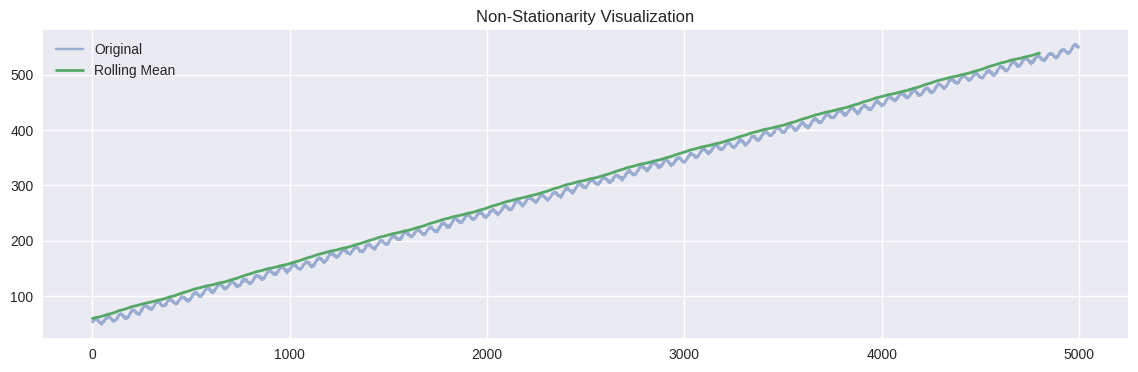

In [9]:

rolling_mean = np.convolve(series, np.ones(200)/200, mode='valid')

plt.figure(figsize=(14,4))
plt.plot(series, alpha=0.5, label="Original")
plt.plot(np.arange(len(rolling_mean)), rolling_mean, linewidth=2, label="Rolling Mean")
plt.legend()
plt.title("Non-Stationarity Visualization")
plt.show()



### Motivation for N-BEATS

- Multiple seasonalities
- Non-stationary trend
- Long-range dependencies
- Nonlinear interactions

Classical models struggle with these patterns.
N-BEATS provides flexible and interpretable forecasting.


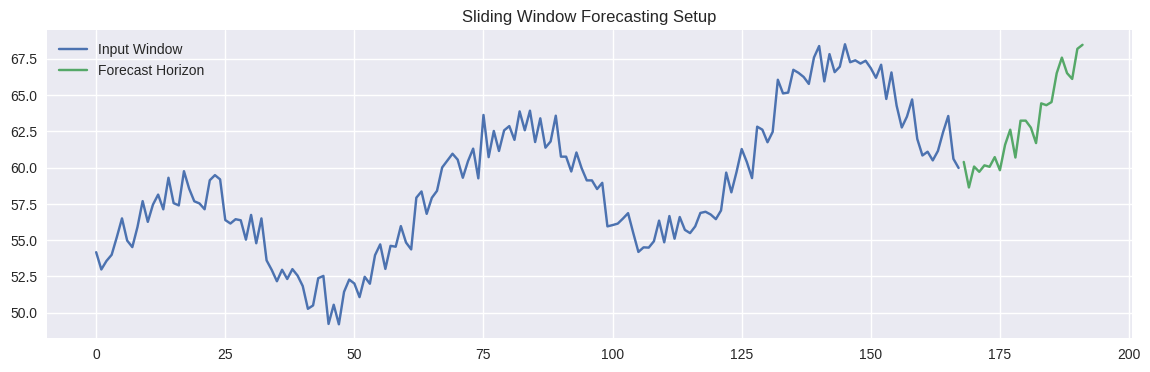

In [10]:

LOOKBACK = 168
HORIZON = 24

x_window = series[:LOOKBACK]
y_window = series[LOOKBACK:LOOKBACK+HORIZON]

plt.figure(figsize=(14,4))
plt.plot(x_window, label="Input Window")
plt.plot(range(LOOKBACK, LOOKBACK+HORIZON), y_window, label="Forecast Horizon")
plt.legend()
plt.title("Sliding Window Forecasting Setup")
plt.show()



### Summary of EDA

- Clear trend and multiple seasonal cycles
- Strong autocorrelation at seasonal lags
- Non-stationary behavior
- Justifies use of N-BEATS for forecasting
